In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [11]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

ed_df = pd.read_sql_query('select * from useducation',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?
* If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.
* Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.
* Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.
* Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?
* If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

In [12]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

In [14]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = ed_df["STATE"].unique()

for state in states:
    ed_df.loc[ed_df["STATE"] == state, fill_list] = ed_df.loc[ed_df["STATE"] == state, fill_list].interpolate()

ed_df.dropna(inplace=True)

In [15]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 209 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   466 non-null    object 
 1   STATE                         466 non-null    object 
 2   YEAR                          466 non-null    int64  
 3   ENROLL                        466 non-null    float64
 4   TOTAL_REVENUE                 466 non-null    float64
 5   FEDERAL_REVENUE               466 non-null    float64
 6   STATE_REVENUE                 466 non-null    float64
 7   LOCAL_REVENUE                 466 non-null    float64
 8   TOTAL_EXPENDITURE             466 non-null    float64
 9   INSTRUCTION_EXPENDITURE       466 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  466 non-null    float64
 11  OTHER_EXPENDITURE             466 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    466 non-null    float64
 13  GR

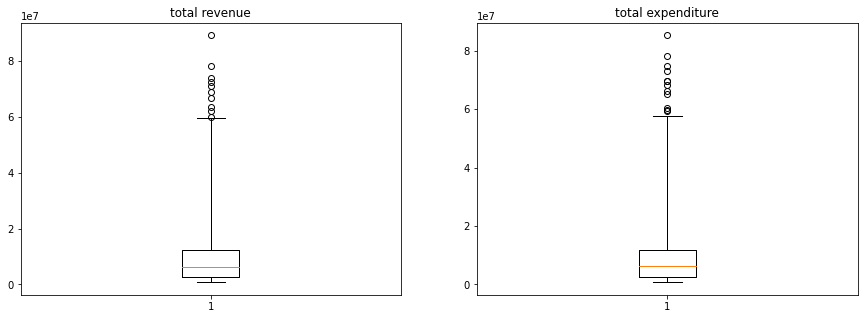

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.boxplot(ed_df['TOTAL_REVENUE'], whis=5)
plt.title('total revenue')

plt.subplot(1, 2, 2)
plt.boxplot(ed_df['TOTAL_EXPENDITURE'], whis=5)
plt.title('total expenditure')
plt.show()

Given a large whisker, there are still outlier to top-end of the graph

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.

In [23]:
from scipy.stats.mstats import winsorize

winsor_rev = winsorize(ed_df['TOTAL_REVENUE'], (0, 0.05))
winsor_exp = winsorize(ed_df['TOTAL_EXPENDITURE'], (0, 0.05))

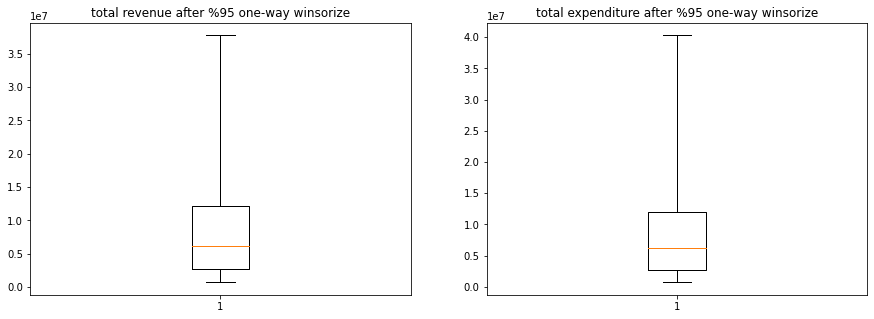

In [25]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.boxplot(winsor_rev, whis=5)
plt.title('total revenue after %95 one-way winsorize')

plt.subplot(1, 2, 2)
plt.boxplot(winsor_exp, whis=5)
plt.title('total expenditure after %95 one-way winsorize')
plt.show()

There are now, no outliers after winsorizing.

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.

In [26]:
budget_total = ed_df.TOTAL_REVENUE - ed_df.TOTAL_EXPENDITURE

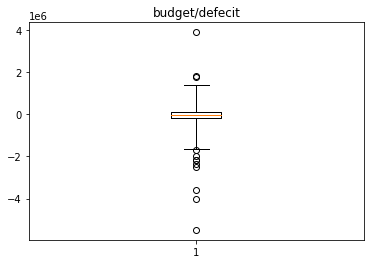

In [27]:
plt.boxplot(budget_total, whis=5)
plt.title('budget/defecit')
plt.show()

In [29]:
budget_winsor = winsorize(budget_total,(0.05, 0.05))

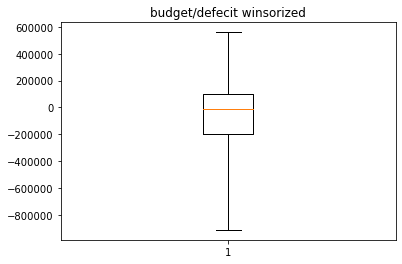

In [30]:
plt.boxplot(budget_winsor, whis=5)
plt.title('budget/defecit winsorized')
plt.show()

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [31]:
budget2_total = winsor_rev - winsor_exp

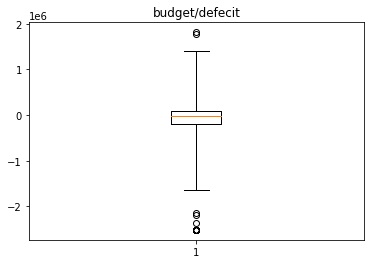

In [32]:
plt.boxplot(budget2_total, whis=5)
plt.title('budget/defecit')
plt.show()

In [33]:
budget2_winsor = winsorize(budget2_total,(0.05, 0.05))

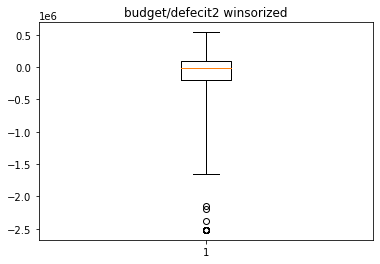

In [34]:
plt.boxplot(budget2_winsor, whis=5)
plt.title('budget/defecit2 winsorized')
plt.show()

This method eliminated almost all the outliers. The rest could be eliminated by changing the lower threshold.

5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

In [36]:
budget_df = pd.DataFrame(data = {'budget_winsor':budget_winsor, 'budget2_winsor':budget2_winsor})

In [66]:
stat_diff_df = budget_df.describe()
stat_diff_df['difference'] = stat_diff_df['budget_winsor'] - stat_diff_df['budget2_winsor']
stat_diff_df

,budget_winsor,budget2_winsor,difference
count,466.000000,4.660000e+02,0.000000e+00
mean,-58733.012876,-1.720532e+05,1.133202e+05
std,341300.816505,6.509561e+05,-3.096553e+05
min,-913765.000000,-2.518429e+06,1.604664e+06
25%,-196574.750000,-2.047750e+05,8.200250e+03
50%,-8872.500000,-1.282350e+04,3.951000e+03
75%,101394.750000,9.826300e+04,3.131750e+03
max,560511.000000,5.400550e+05,2.045600e+04


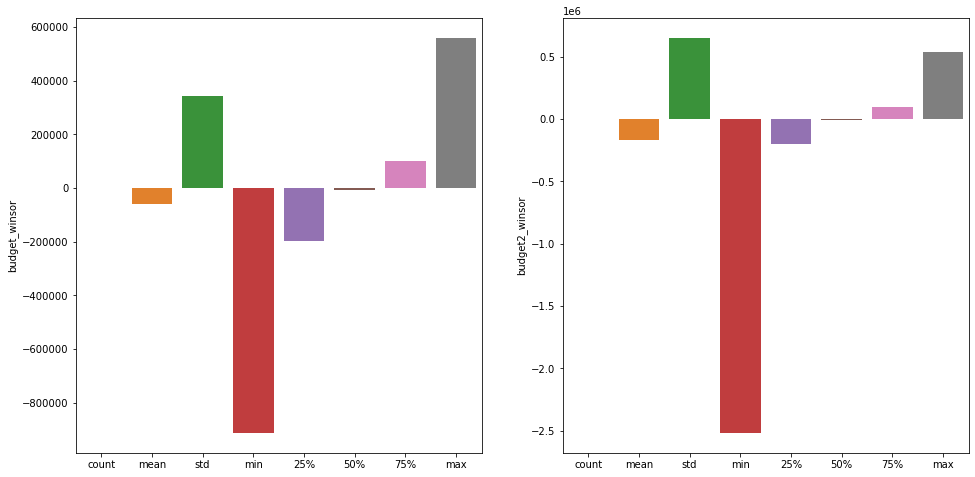

In [63]:
plt.figure(figsize = (16,8))
sns.barplot(x=['count','mean','std','min','25%','50%','75%','max'], y=budget_df.describe().budget_winsor)
sns.barplot(x=['count','mean','std','min','25%','50%','75%','max'], y=budget_df.describe().budget2_winsor)
plt.show()

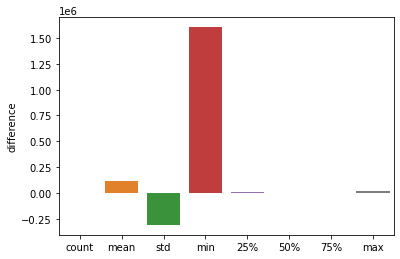

In [67]:
sns.barplot(x=['count','mean','std','min','25%','50%','75%','max'], y=stat_diff_df['difference'])
plt.show()

the above bar graph show the differnce between the two methods

6. If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

Because taking the difference between may help will eliminate some outlier, it would be better the work with the orignal data before using other outlier elimination methods.